# Word Cloud Project_Lin (Topic: Vehicle crash)

For this project, I created a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

The input of the Project comes from the abstract of my master thesis: investigation and optimization of the crash behavior of a body structure 



In [24]:
# Here are all the installs and imports needed for my word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /opt/conda/lib/python3.6/site-packages/fileupload/static -> fileupload
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/jovyan/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


<br><br>
**To upload the text file, run the following cell that contains all the code for a custom uploader widget. Once this cell gets runed, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.**

In [25]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Abstract.txt` (0.87 kB)


The uploader widget saved the contents of the uploaded file into a string object named *file_contents* that word cloud script can process. 

This is the main function cell that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate the own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [34]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # Remove all punctuations and lower all capital letters 
    
    for character in file_contents:
        if character.isalpha() == False:
           file_contents = file_contents.replace(character," ")
        else:
            pass
    file_contents=file_contents.lower()
    
    # split the whole text into words 
    words = file_contents.split()

    #create a word list without uninteresting words by using list comprehension
    words = [word for word in words if word not in uninteresting_words]
    
    #create null dictionary
    worddic={}
    for word in words:
        if word not in worddic:
            worddic[word]=1
        else:
            worddic[word]+=1
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(worddic)
    return cloud.to_array()

the word cloud image should appear after running the cell below if the function has been defined correctly.

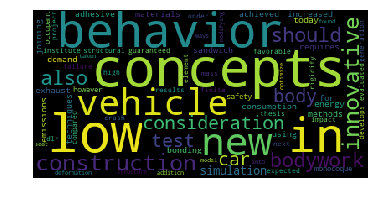

In [35]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

**This image illustrates the keyword of the abstract of my master thesis by counting the frequencies of each word appeared. You can also use this python function to create your own word cloud image to illustrate information intuitively.**
